In [380]:
pip install seaborn



The following command must be run outside of the IPython shell:

    $ pip install seaborn

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more informations on how to install packages:

    https://docs.python.org/3/installing/


In [381]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [382]:
train = pd.read_csv('Heart.csv')

In [383]:
train1 = train.copy()

In [384]:
train_original = train.copy()


In [385]:
train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [386]:
train.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [387]:
train.shape


(303, 14)

In [388]:
train.replace({'sex': {1: 'Male', 0: ' Female'}} ,inplace= True)
train.replace({'target' :{1 : 'Yes' , 0 : 'No'}}, inplace = True)
train.replace({'cp' : {0 : 'Typical Angina' , 1 : 'Atypical Angina' , 2 : 'non-anginal pain' , 3 : 'asymptomatic' }}, inplace = True)
train.replace({'slope' : {0 : 'upsloping' , 1 : 'flat' , 2 : 'downsloping'}}, inplace = True)
train.replace({'ca' : {0 : '1 Vessel' , 1 : '2 Vessels' , 2 : '3 vessels'}}, inplace = True)
train.replace({'thal' : {1 : 'Normal' , 2 : 'fixed defect' , 3 : 'reversable defect'}}, inplace = True)

In [389]:
train.dtypes 

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

In [390]:
train.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [391]:
# Univariate analysis of categorical Variable

train['sex'].value_counts(normalize = True)


Male       0.683168
 Female    0.316832
Name: sex, dtype: float64

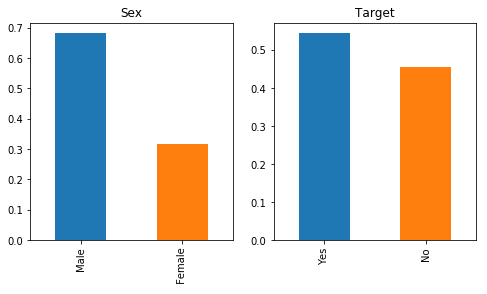

In [392]:
plt.figure()
plt.subplot(121)
train['sex'].value_counts(normalize = True).plot.bar(figsize = (8,4), title = 'Sex')
plt.subplot(122)
train['target'].value_counts(normalize = True).plot.bar(title = 'Target')
plt.show()

In [393]:
#It can be seen that male are more at risk for a heart attack and our target 
# variable is not highly imbalanced, So we will not try to balance it.

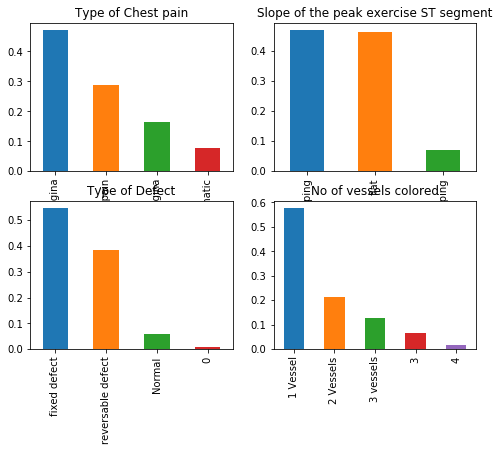

In [394]:
# Univariate analysis of ordinal Variables.
plt.figure(2)
plt.subplot(221)
train['cp'].value_counts(normalize = True).plot.bar(figsize =( 8, 6), title = 'Type of Chest pain')
plt.subplot(222)
train['slope'].value_counts(normalize = True).plot.bar(title = 'Slope of the peak exercise ST segment')
plt.subplot(223)
train['thal'].value_counts(normalize = True).plot.bar(title = 'Type of Defect')
plt.subplot(224)
train['ca'].value_counts(normalize = True).plot.bar(title = 'No of vessels colored')
plt.show()



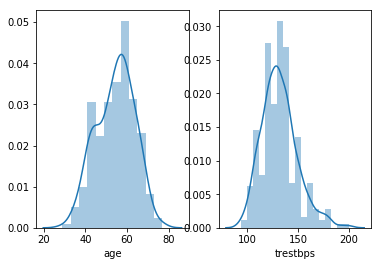

In [395]:
#Univariate analysis of numerical variables
plt.figure(2)
plt.subplot(121)
sns.distplot(train['age'])

plt.subplot(122)
sns.distplot(train['trestbps'])
plt.show()


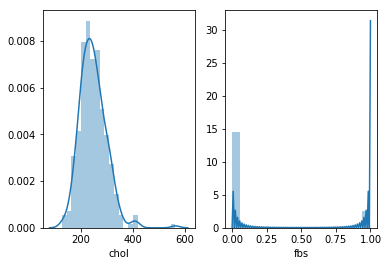

In [396]:
plt.figure(3)
plt.subplot(121)
sns.distplot(train['chol'])

plt.subplot(122)
sns.distplot(train['fbs'])

plt.show()

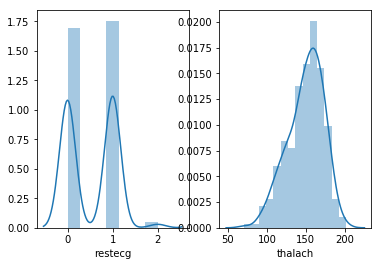

In [397]:
plt.figure(4)
plt.subplot(121)
sns.distplot(train['restecg'])

plt.subplot(122)
sns.distplot(train['thalach'])

plt.show()

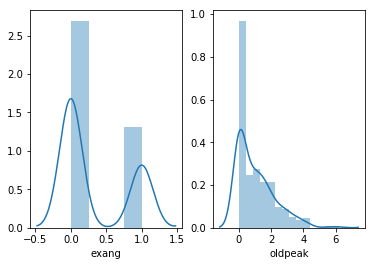

In [398]:
plt.figure(5)
plt.subplot(121)
sns.distplot(train['exang'])

plt.subplot(122)
sns.distplot(train['oldpeak'])

plt.show()


In [399]:
# Exploring the two groups of the target variable.
train.groupby('target').mean()


,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak
target,,,,,,,,
No,56.601449,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507
Yes,52.496970,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030


In [400]:
train.groupby('restecg').mean()

,age,trestbps,chol,fbs,thalach,exang,oldpeak
restecg,,,,,,,
0,55.687075,134.027211,255.142857,0.176871,147.904762,0.367347,1.159184
1,52.914474,129.065789,237.269737,0.125000,151.960526,0.282895,0.879605
2,61.000000,140.500000,261.750000,0.000000,125.750000,0.500000,2.725000


In [401]:
#There are a couple of observations that we can make.
#1.The observations that we see is that the observations without heart problem 
# have higher values of all observations except 'restcg' and 'thalach'

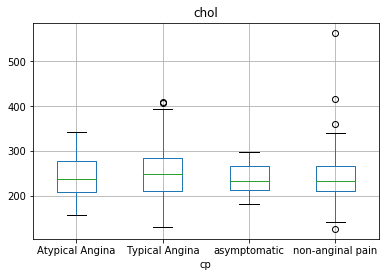

In [402]:
#***Bivariate analysis and Finding correlataions***.
#To check type of pain by cholestrol

train.boxplot(column = 'chol' , by = 'cp')
plt.suptitle("")
plt.show()

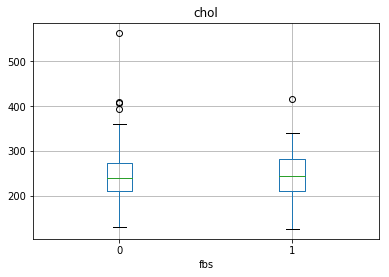

In [403]:
train.boxplot(column = 'chol' , by = 'fbs')
plt.suptitle("")
plt.show()

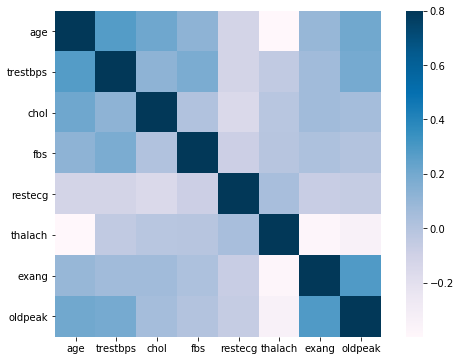

In [404]:
# Correlations
plt.subplots(figsize = (9,6))
matrix = train.corr()
sns.heatmap(matrix,vmax = .8, square = True, cmap = 'PuBu')
plt.show()

In [405]:
# 1)From the above heat map we can see that the variables most correlated with the
# target are exang, trestbps, and age.

# 2)It is very interesting to note that the variables like cholestrol and fasting
# blood sugar seem to be having not much influence on the target variable, which 
# is an interesting finding.


# 3) No need for missing values imputations as there are no missing values.

In [406]:
# Checking for outliers in three influencing variables, so that any outliers if
# any could be treated now, so that it doesnt skwe the results.

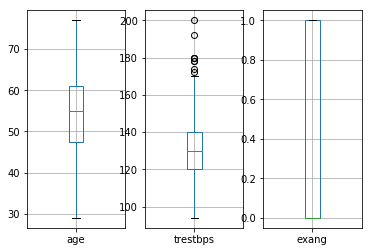

In [407]:
plt.figure(5)
plt.subplot(131)
train.boxplot(column = "age")

plt.subplot(132)
train.boxplot(column = 'trestbps')

plt.subplot(133)
train.boxplot(column = 'exang')

plt.show()


In [408]:
# We can see from the above box plots that the variable "trestbps
# has outliers and we are now going to treat the outliers by trying log transformations.


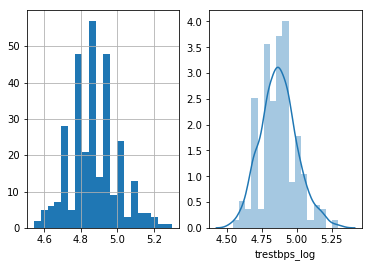

In [409]:
train['trestbps_log'] = np.log(train['trestbps'])
plt.figure(6)
plt.subplot(121)
train['trestbps_log'].hist(bins = 20)

plt.subplot(122)
sns.distplot(train['trestbps_log'])
plt.show()

In [410]:
# Now the outliers have been treated and the graph looks more normal shape.

In [412]:
#Model building using scikit learn.
# Science Sklearn requires the target variable in a seperate dataset, we will drop 
# our target variable from the train dataset and save it n another dataset.
x = train.drop('target', 1)
y = train.target

In [413]:
x = pd.get_dummies(x)
train = pd.get_dummies(train)

In [414]:
# Since we wre not given test dataset, we will not be able to test the model on 
# rest data. We can only train the model so that this
# model could be used to make predictions with new data if it was available.
# To validate the model, we will use cross validation. The idea is to train 
# the model in the train part and make predictions for the validation part.
# And finally find the accuracy of our model on the validation data. 
# We will use the train_test_split function from sklearn and split train dataset.

#Logistic Regression Assumptions
1.Binary logistic regression requires the dependent variable to be binary.
2.For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
3.Only the meaningful variables should be included.
4.The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
5.The independent variables are linearly related to the log odds.
6.Logistic regression requires quite large sample sizes.

from sklearn.model_selection import train_test_split
x_traind,x_cv,y_traind,y_cv = train_test_split(x,y,test_size= 0.3)

SyntaxError: invalid syntax (<ipython-input-414-6110c62f4e85>, line 10)

In [376]:
# Now to build the model, import LogisticRegresssion and accuracy_score 
#from sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train,y_train)


ValueError: could not convert string to float: 'fixed defect'